Car Price Prediction Project

In [32]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [33]:
#Reading Data
import os
os.chdir(r'C:\Study\Machine Learning\Mini Projects\Linear_Regression_Car_Price_Prediction')
car_data=pd.read_csv('CarPrice_Assignment.csv')

In [56]:
car_data.head()
car_data.describe()

,car_ID,symboling,fueltype,carbody,drivewheel,wheelbase,carlength,carwidth,carheight,curbweight,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,aspiration_turbo,doornumber_two,enginelocation_rear
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,0.097561,0.819512,0.458537,98.756585,174.049268,65.907805,53.724878,2555.565854,...,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571,0.180488,0.439024,0.014634
std,59.322565,1.245307,0.297446,0.990944,0.581148,6.021776,12.337289,2.145204,2.443522,520.680204,...,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332,0.385535,0.497483,0.120377
min,1.000000,-2.000000,0.000000,0.000000,0.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,...,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,0.000000,0.000000,0.000000
25%,52.000000,0.000000,0.000000,0.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,...,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000,0.000000,0.000000,0.000000
50%,103.000000,1.000000,0.000000,1.000000,0.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,...,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000,0.000000,0.000000,0.000000
75%,154.000000,2.000000,0.000000,1.000000,1.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,...,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000,0.000000,1.000000,0.000000
max,205.000000,3.000000,1.000000,4.000000,2.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,...,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000,1.000000,1.000000,1.000000


In [35]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [36]:
car_data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [37]:
car_data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [38]:
#print(car_data['fueltype'].value_counts())
#print(car_data['drivewheel'].value_counts())
#print(car_data['carbody'].value_counts())
#print(car_data['aspiration'].value_counts())
print(car_data['enginetype'].value_counts())

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64


In [39]:
#manual encoding
car_data.replace({'fueltype':{'gas':0, 'diesel':1, }}, inplace=True)
car_data.replace({'drivewheel':{'fwd':0, 'rwd':1, '4wd':2 }}, inplace=True)
car_data.replace({'carbody':{'sedan':0, 'hatchback':1, 'wagon':2,'hardtop':3,'convertible':4 }}, inplace=True)
car_data.replace({'cylindernumber':{'four':0, 'six':1, 'five':2,'eight':3,'two':4,'three':5, 'twelve':6 }}, inplace=True)
car_data.replace({'fuelsystem':{'mpfi':0, '2bbl':1, 'idi':2,'1bbl':3,'spdi':4,'4bbl':5, 'mfi':6,'spfi':7 }}, inplace=True)
car_data.replace({'enginetype':{'ohc':0, 'ohcf':1, 'ohcv':2,'dohc':3,'l':4,'rotor':5, 'dohcv':6}}, inplace=True)
#one hot encoding
car_data=pd.get_dummies(car_data, columns=['aspiration','doornumber','enginelocation'], drop_first=True)

In [40]:
car_data.head()

,car_ID,symboling,CarName,fueltype,carbody,drivewheel,wheelbase,carlength,carwidth,carheight,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,aspiration_turbo,doornumber_two,enginelocation_rear
0,1,3,alfa-romero giulia,0,4,1,88.6,168.8,64.1,48.8,...,2.68,9.0,111,5000,21,27,13495.0,0,1,0
1,2,3,alfa-romero stelvio,0,4,1,88.6,168.8,64.1,48.8,...,2.68,9.0,111,5000,21,27,16500.0,0,1,0
2,3,1,alfa-romero Quadrifoglio,0,1,1,94.5,171.2,65.5,52.4,...,3.47,9.0,154,5000,19,26,16500.0,0,1,0
3,4,2,audi 100 ls,0,0,0,99.8,176.6,66.2,54.3,...,3.40,10.0,102,5500,24,30,13950.0,0,0,0
4,5,2,audi 100ls,0,0,2,99.4,176.6,66.4,54.3,...,3.40,8.0,115,5500,18,22,17450.0,0,0,0


In [41]:
#one hot encoding
#car_data=pd.get_dummies(car_data, columns=['aspiration','carbody','drivewheel','enginelocation', 'wheelbase','enginetype','fuelsystem','cylindernumber','doornumber'], drop_first=True)

In [42]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   car_ID               205 non-null    int64  
 1   symboling            205 non-null    int64  
 2   CarName              205 non-null    object 
 3   fueltype             205 non-null    int64  
 4   carbody              205 non-null    int64  
 5   drivewheel           205 non-null    int64  
 6   wheelbase            205 non-null    float64
 7   carlength            205 non-null    float64
 8   carwidth             205 non-null    float64
 9   carheight            205 non-null    float64
 10  curbweight           205 non-null    int64  
 11  enginetype           205 non-null    int64  
 12  cylindernumber       205 non-null    int64  
 13  enginesize           205 non-null    int64  
 14  fuelsystem           205 non-null    int64  
 15  boreratio            205 non-null    flo

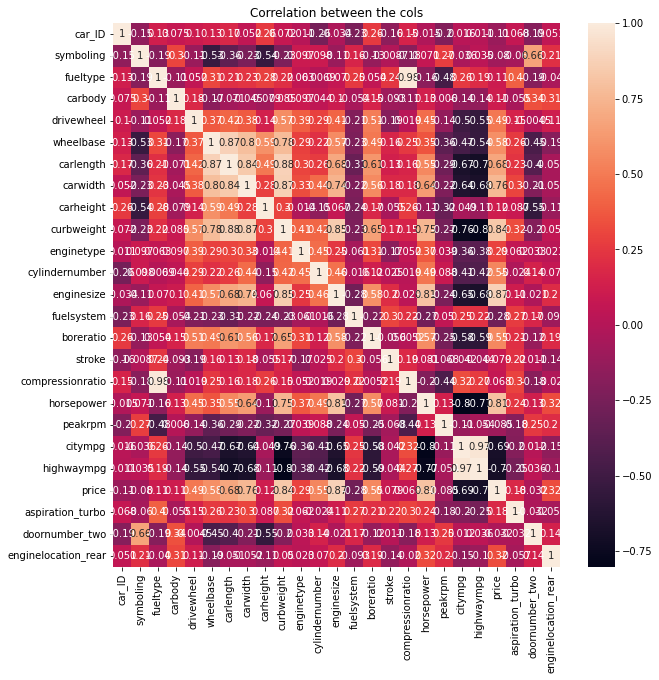

In [43]:
#heatmap
plt.figure(figsize=(10,10))
sns.heatmap(car_data.corr(), annot=True)
plt.title('Correlation between the cols')
plt.show()

In [44]:
#X=car_data.drop(['CarName', 'price', 'aspiration','carbody','drivewheel','enginelocation', 'wheelbase','enginetype','fuelsystem','cylindernumber','doornumber'] , axis=1)
#X=car_data.drop(['CarName', 'price','cylindernumber'] , axis=1)
X=car_data.drop(['CarName', 'price'] , axis=1)
Y=car_data['price']

In [45]:
print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)

Shape of X: (205, 24)
Shape of Y: (205,)


In [46]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.2, random_state=50)


In [47]:
print("Shape of X_train:", X_train.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_test:", Y_test.shape)

Shape of X_train: (164, 24)
Shape of Y_train: (164,)
Shape of X_test: (41, 24)
Shape of Y_test: (41,)


In [48]:
scaler = StandardScaler()


In [49]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


In [50]:
model=LinearRegression()


In [51]:
model.fit(X_train,Y_train)


LinearRegression()

In [52]:
pred=model.predict(X_test)


In [53]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,f1_score

In [54]:
#For linear Model
print("MAE:", (metrics.mean_absolute_error(pred,Y_test)))
print("MSE:", (metrics.mean_squared_error(pred,Y_test)))
print("maxerror:", (metrics.max_error(pred,Y_test)))
print("r2score:",(metrics.r2_score(Y_test, pred, sample_weight=None)))


MAE: 1904.8136664196954
MSE: 5227309.092778553
maxerror: 5643.934832663579
r2score: 0.8866060750420439


Text(0, 0.5, 'Actual Price ')

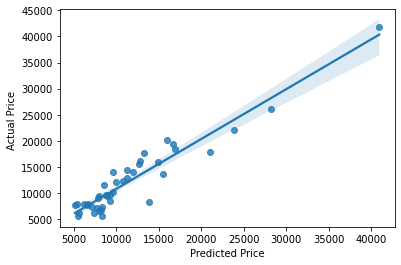

In [55]:
sns.regplot(y=pred, x=Y_test)
plt.xlabel("Predicted Price")
plt.ylabel("Actual Price ")